In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# # OR Gate
x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
y = np.array([1, 1, 1, 0]).reshape(-1, 1)

# AND Gate
# x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
# y = np.array([1, 0, 0, 0]).reshape(-1, 1)

## 1 Layer Neural Network

In [69]:
## Initialize Paramters

def init_params(x, network_size = [1]):
    num_neurons = network_size
    w1 = np.random.randn(x.shape[1], num_neurons[0])
    b1 = np.random.randn(num_neurons[0])
    return w1, b1

In [70]:
## Forward Prop

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_prop(x, w1, b1):
    z1 = np.dot(x, w1) + b1
    yhat = sigmoid(z1)
    return yhat

def crossentropy_loss(y, yhat, n):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))/n

In [71]:
## Backward Prop

learning_rate = 0.01

def derivative_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))

def back_prop(x, y, yhat, w1, b1):
    # Gradient Updates
    dl_wrt_yhat = -np.divide(y, yhat) + np.divide((1 - y), (1 - yhat))
    dyhat_wrt_z1 = derivative_sigmoid(yhat)
    dz1_wrt_w1 = x

    # Gradient w1
    dl_wrt_w1 = np.dot(x.T, (dl_wrt_yhat*dyhat_wrt_z1))

    # Gradient b1
    dl_wrt_b1 = np.sum(dl_wrt_yhat*dyhat_wrt_z1)

    # Update w, b
    w1 -= learning_rate*dl_wrt_w1
    b1 -= learning_rate*dl_wrt_b1

    return w1, b1

In [102]:
n_iter = 1000
learning_rate = 0.01
loss = []
w_epoch = []
m, n = x.shape[1], x.shape[0] 
w1, b1 = init_params(x, network_size = [1])
for epoch in range(n_iter):
    yhat = forward_prop(x, w1, b1)
    ce_loss = crossentropy_loss(y, yhat, n)
    loss.append(ce_loss)
    w_epoch.append(w1[0][0])
    w1, b1 = back_prop(x, y, yhat, w1, b1)
    # if epoch % 300 == 0:
    #     print(epoch, forward_prop(x, w1, b1), w1, b1)

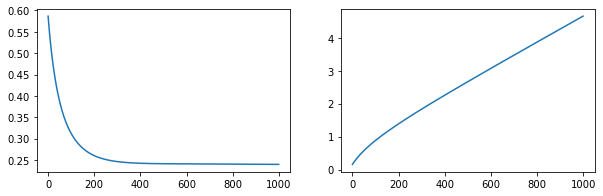

In [103]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(range(n_iter), loss)
plt.subplot(122)
plt.plot(range(n_iter), w_epoch)

In [106]:
forward_prop(x, w1, b1)

array([[0.9999771 ],
       [0.99410491],
       [0.99756748],
       [0.61292826]])

## 2 Layer Neural Network

In [107]:
## Initialize Paramters

def init_params(x, network_size = [3, 1]):
    num_neurons = network_size
    w1 = np.random.randn(x.shape[1], num_neurons[0])
    b1 = np.random.randn(num_neurons[0])

    w2 = np.random.randn(num_neurons[0], num_neurons[1])
    b2 = np.random.randn(num_neurons[1])

    return w2, b2, w1, b1

In [108]:
## Forward Prop
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_prop(x, w1, b1, w2, b2):
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, w2) + b2
    yhat = sigmoid(z2)
    return yhat
    
def crossentropy_loss(y, yhat, n):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))/n

In [109]:
## Backward Prop
learning_rate = 0.01

def derivative_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))

def back_prop(x, y, yhat, w1, b1, w2, b2):
    # Gradient Updates
    dl_wrt_yhat = -np.divide(y, yhat) + np.divide((1 - y), (1 - yhat))
    dyhat_wrt_z2 = derivative_sigmoid(yhat)
    a1 = sigmoid(np.dot(x, w1) + b1)
    dz2_wrt_w2 = a1
    dz2_wrt_a1 = w2
    da1_wrt_z1 = derivative_sigmoid(a1)
    dz1_wrt_w1 = x

    # Gradient w2
    dl_wrt_w2 = np.dot(dz2_wrt_w2.T, (dl_wrt_yhat*dyhat_wrt_z2))

    # Gradient b2
    dl_wrt_b2 = np.sum(dl_wrt_yhat*dyhat_wrt_z2)

    # Gradient w1
    dl_wrt_a1 = np.dot(w2, (dl_wrt_yhat*dyhat_wrt_z2).T)
    dl_wrt_w1 = np.dot(x.T, (da1_wrt_z1*dl_wrt_a1.T))


    # Gradient b1
    dl_wrt_b1 = np.sum(np.dot(da1_wrt_z1, dl_wrt_a1))

    # Update w, b
    w2 -= learning_rate*dl_wrt_w2
    b2 -= learning_rate*dl_wrt_b2

    w1 -= learning_rate*dl_wrt_w1
    b1 -= learning_rate*dl_wrt_b1

    return w2, b2, w1, b1

In [110]:
# # OR Gate
x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
y = np.array([1, 1, 1, 0]).reshape(-1, 1)

# AND Gate
# x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
# y = np.array([1, 0, 0, 0]).reshape(-1, 1)

In [111]:
n_iter = 5000
learning_rate = 0.01
loss = []
w_epoch = []

m, n = x.shape[1], x.shape[0] 
w2, b2, w1, b1 = init_params(x, network_size = [3, 1])

for epoch in range(n_iter):
    yhat = forward_prop(x, w1, b1, w2, b2)
    ce_loss = crossentropy_loss(y, yhat, n)
    w_epoch.append(w1[0][0])
    loss.append(ce_loss)
    w2, b2, w1, b1 = back_prop(x, y, yhat, w1, b1, w2, b2)

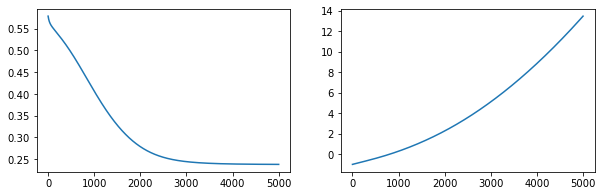

In [112]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(range(n_iter), loss)
plt.subplot(122)
plt.plot(range(n_iter), w_epoch)

In [113]:
forward_prop(x, w1, b1, w2, b2)

array([[0.99997017],
       [0.99997014],
       [0.99997002],
       [0.61399098]])